In [1]:
import cv2
import albumentations as A
import numpy as np


In [2]:
import os
import cv2 
import matplotlib.pyplot as plt

[Albumentation Doc](https://albumentations.ai/docs/api_reference/augmentations/transforms/)

#### Data structure
- dataset/ --> each class folder (e.g. dataset/0/, dataset/1/, ...)

0
1
2
3
4
5
6
7
8
9


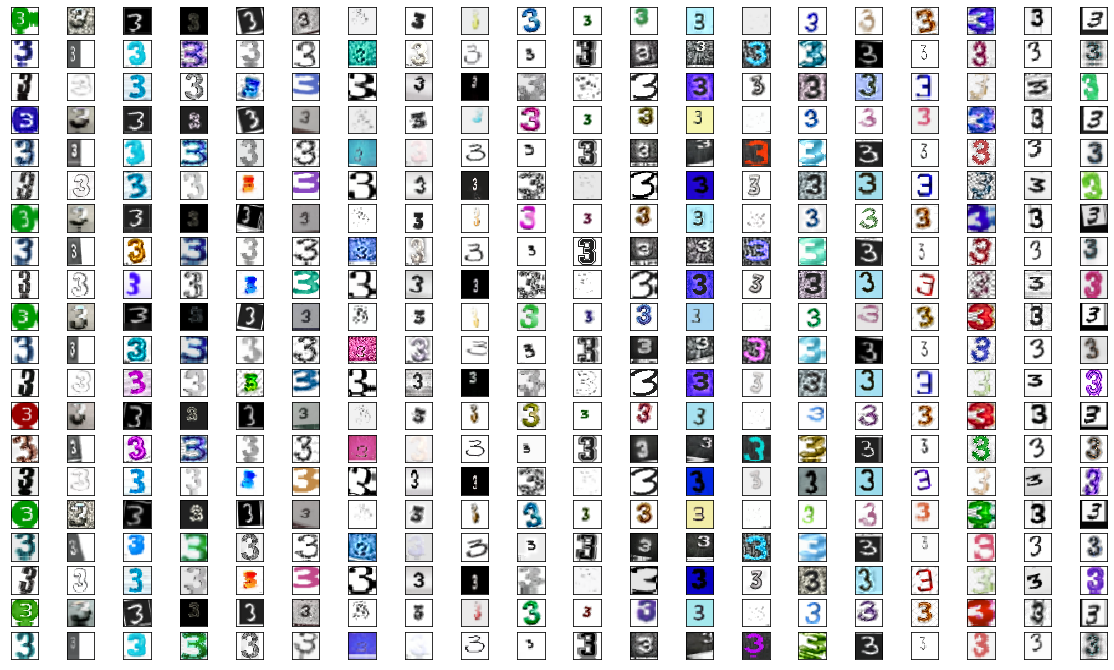

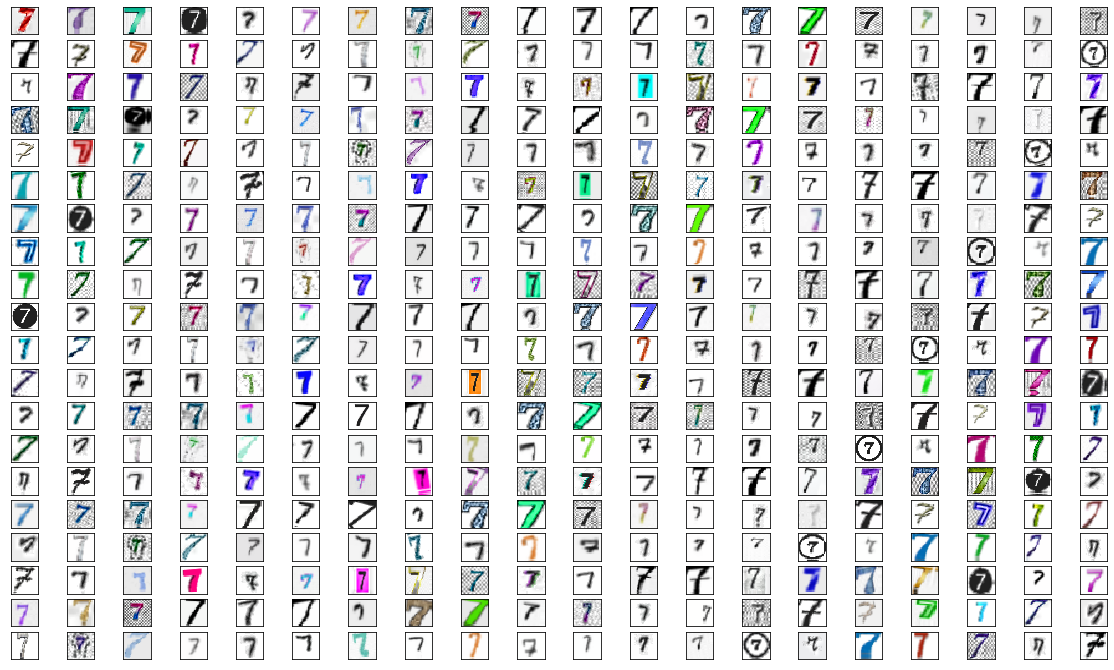

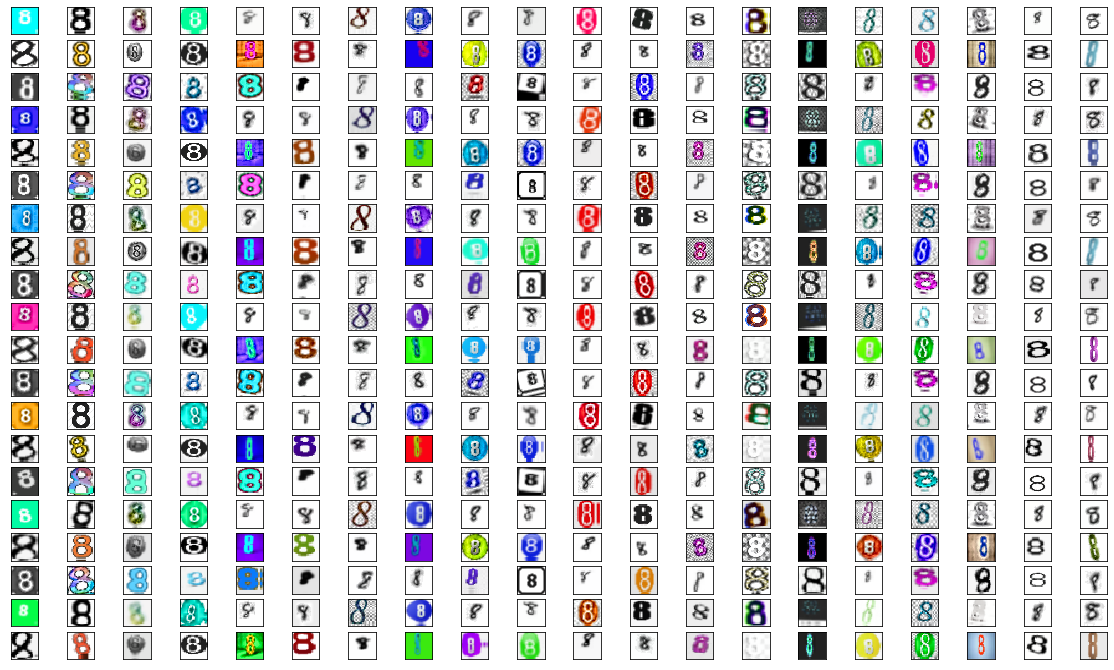

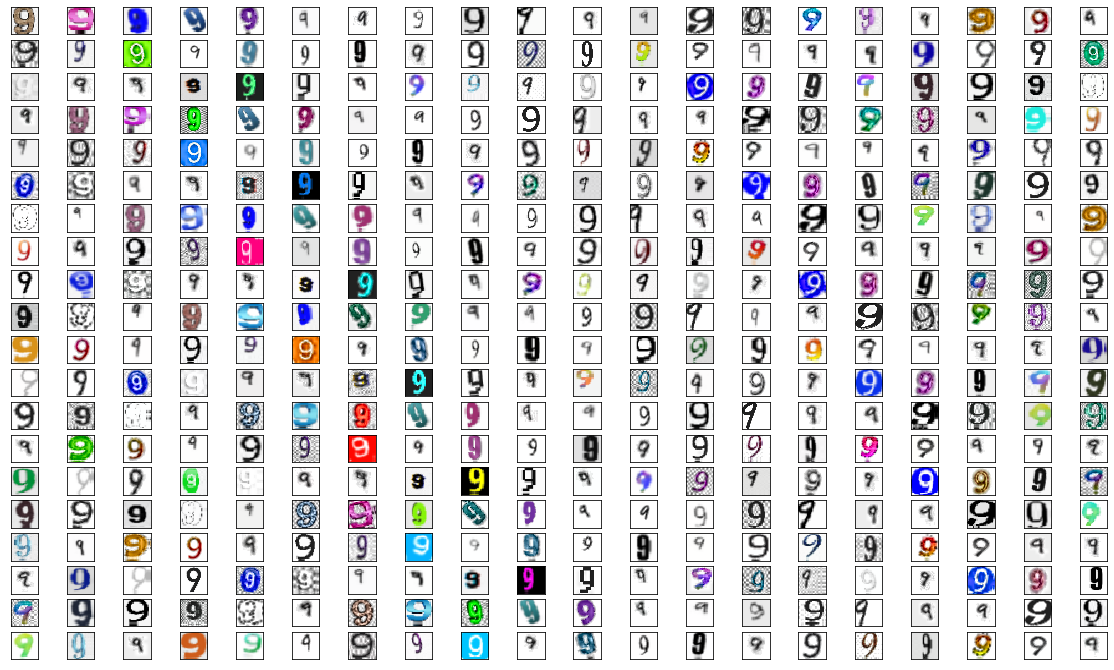

In [23]:
for i in range(0, 10):
    print(i)
    # DATASET PATH
    path = f"dataset/{i}/"
    files = os.listdir(path)
    img_list = []
    for file in files:
        img = cv2.imread(path + file)
        img_list.append(img)

    
    transform = A.Compose(
        [A.Resize(28, 28),
         A.GridDistortion(p = 0.7),
         A.Rotate(limit = 15, p = 0.5),
         A.ColorJitter(brightness=0.1, contrast=0.1, saturation= 0.1, hue = 0.1, p = 0.5),
         A.Blur(blur_limit = 2, p = 0.5),
         A.RGBShift(r_shift_limit = 0.3, g_shift_limit = 0.3, b_shift_limit = 0.3, p=0.7),
         A.ChannelShuffle(p = 0.5),
            A.OneOf([
                A.GridDistortion(p = 0.5),
                A.CLAHE(p = 0.5),
            ], p = 1.0),
        ])


    images_list = []
    for j in range(40):
        for idx, image in enumerate(img_list):
            augmentations = transform(image = image)
            augmented_img = augmentations["image"]
            cv2.imwrite(path + f"{i}_{j}_{idx}.jpg", augmented_img)
            images_list.append(augmented_img)
            
    plt.figure( figsize=(20,12))
    for k in range(400):
        plt.subplot(20 ,20 ,k+1)
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(images_list[k])
    plt.savefig("dataset/" + f"{i}.jpg")

